In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
from jupyterthemes import get_themes
from jupyterthemes.stylefx import set_nb_theme
#set_nb_theme('onedork')
set_nb_theme('default')
#!jt -l
#!jt -r

IndexError: list index out of range

In [3]:
!dir

 El volumen de la unidad E es Nuevo vol
 El n£mero de serie del volumen es: 889F-0878

 Directorio de E:\Bibliotecas\Documents\Universidad\PG

23/02/2021  07:04 p. m.    <DIR>          .
23/02/2021  07:04 p. m.    <DIR>          ..
10/02/2021  12:18 p. m.    <DIR>          .ipynb_checkpoints
10/02/2021  01:12 a. m.           539,130 08392219.pdf
10/02/2021  01:12 a. m.           205,954 08546939.pdf
11/02/2021  12:17 a. m.           179,534 2.pptx
08/02/2021  10:08 p. m.        27,837,473 2019_Book_BeginningAnomalyDetectionUsing.pdf
08/02/2021  09:14 p. m.    <DIR>          cache
20/09/2019  12:04 a. m.       150,828,752 creditcard.csv
09/02/2021  11:12 p. m.    <DIR>          EXAMPLE
05/08/2020  03:21 p. m.       150,354,339 fraudTest.csv
05/08/2020  03:22 p. m.       351,238,196 fraudTrain.csv
27/01/2021  09:55 a. m.           163,563 GermanDataset.txt
27/01/2021  09:58 a. m.                73 jupyter.txt
10/02/2021  03:53 p. m.                 0 link.txt
27/01/2021  09:24 a. m.     

# European Dataset

In [2]:
eurData = pd.read_csv('creditcard.csv')
eurData.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### 31 Variables. Class corresponde al target, 0 si no es transacción fraudulenta, 1 de lo contrario.

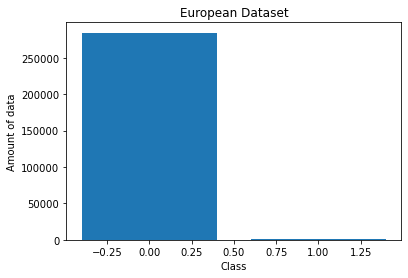

Total: 284807
Válidas: 284315
Fraude: 492
0.1727%


In [9]:
n_fraud = sum( eurData['Class'].values )
n_valid = sum( eurData['Class'].values-1 )*-1

plt.bar([0,1], [n_valid, n_fraud])
plt.title("European Dataset")
plt.xlabel("Class")
plt.ylabel("Amount of data")
plt.show()

print("Total:", len(eurData))
print("Válidas:", n_valid)
print("Fraude:", n_fraud)
print(str(round(100.0*n_fraud/(n_valid+n_fraud),4))+"%")

# Sparkov Dataset

In [5]:
spkData_train = pd.read_csv('fraudTrain.csv')
spkData_test = pd.read_csv('fraudTest.csv')

spkData_train.sample(5)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
196554,196554,2019-04-11 15:08:07,4996263498048679,"fraud_Turcotte, Batz and Buckridge",health_fitness,27.98,Kendra,King,F,154 Hernandez Keys,...,41.9404,-124.1587,1930,Web designer,1983-06-13,fb3dd23386e163a937112407f29d4dcd,1334156887,42.620119,-123.832238,0
1075673,1075673,2020-03-23 01:06:02,4301028321766222513,fraud_Ruecker Group,misc_net,121.49,Joe,Howard,M,109 Brian Lights Apt. 504,...,40.6025,-80.3863,198,Secretary/administrator,1978-10-26,0cec585486ece5a0a66530cd67585fc3,1364000762,40.209110,-81.346841,0
745864,745864,2019-11-15 14:19:52,676281772837,"fraud_Yost, Schamberger and Windler",kids_pets,27.09,Alicia,Bishop,F,222 Freeman Islands,...,30.8836,-84.3246,3430,"Editor, commissioning",1950-03-25,d3e64b48a4ce7bf6c89c5aed8921cfad,1352989192,31.408904,-83.880424,0
427383,427383,2019-07-10 22:35:49,4198470814557,"fraud_Koss, Hansen and Lueilwitz",home,5.16,Christie,Williamson,F,519 Jerry Views,...,41.4768,-95.3509,2036,Engineering geologist,1971-08-20,bcc50e5af2e9b0c5f33830a6029928c6,1341959749,41.614787,-96.104047,0
753606,753606,2019-11-18 09:06:00,180031190491743,fraud_Trantow PLC,grocery_net,74.18,Becky,Mckinney,F,250 Benjamin Hill Apt. 026,...,30.7145,-88.0918,270712,"Surveyor, land/geomatics",1972-01-05,6e94876b69b05c13048dc4eec1fcb4b7,1353229560,31.687100,-87.516759,0


In [6]:
spkData_train.keys()

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

### 23 Variables. is_fraud corresponde al target, 0 si no es transacción fraudulenta, 1 de lo contrario.

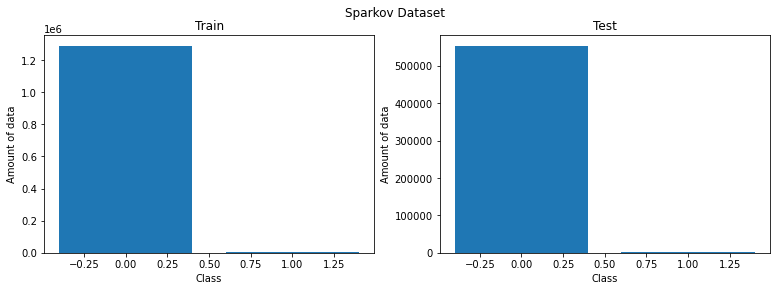

Válidas: 1289169
Fraude: 7506
0.5789%

Válidas: 553574
Fraude: 2145
0.386%


In [7]:
n_fraud_train = sum( spkData_train['is_fraud'].values )
n_valid_train = sum( spkData_train['is_fraud'].values-1 )*-1

plt.figure(figsize=(13,4))
plt.suptitle("Sparkov Dataset")
plt.subplot(1,2,1)
plt.bar([0,1], [n_valid_train, n_fraud_train])
plt.title("Train")
plt.xlabel("Class")
plt.ylabel("Amount of data")

n_fraud_test = sum( spkData_test['is_fraud'].values )
n_valid_test = sum( spkData_test['is_fraud'].values-1 )*-1

plt.subplot(1,2,2)
plt.bar([0,1], [n_valid_test, n_fraud_test])
plt.title("Test")
plt.xlabel("Class")
plt.ylabel("Amount of data")
plt.show()

print("Válidas:", n_valid_train)
print("Fraude:", n_fraud_train)
print(str(round(100.0*n_fraud_train/(n_valid_train+n_fraud_train),4))+"%")
print("")
print("Válidas:", n_valid_test)
print("Fraude:", n_fraud_test)
print(str(round(100.0*n_fraud_test/(n_valid_test+n_fraud_test),4))+"%")

# PCA a 2 componentes.
### Propósito: Ver si hay algún patrón diferenciable.

In [3]:
import sklearn
import mglearn
from sklearn.decomposition import PCA
%matplotlib inline 

In [11]:
X_data = eurData[ eurData.keys()[:-1] ].values
y_data = eurData[ eurData.keys()[ -1] ].values

#X_data = X_train_sm_std
#y_data = Y_train_sm

In [7]:
pca=PCA(n_components=2)
pca.fit(X_data)
X_data_pca = pca.transform(X_data)

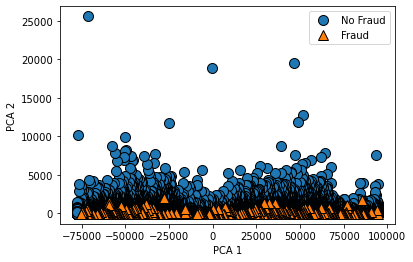

In [8]:
mglearn.discrete_scatter(X_data_pca[:,0],X_data_pca[:,1], y_data)
plt.legend(['No Fraud', 'Fraud'],loc='best')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

## Utilizando MinMaxScaler, se dejan los datos en la misma escala y se hace PCA nuevamente.

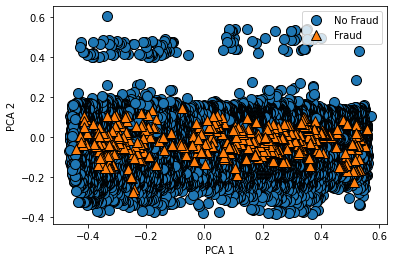

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_data)
X_data_ = scaler.transform(X_data)
pca.fit(X_data_)
X_data_pca = pca.transform(X_data_)
mglearn.discrete_scatter(X_data_pca[:,0], X_data_pca[:,1], y_data)
plt.legend(['No Fraud', 'Fraud'],loc='best')
plt.gca()
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

# Regresión Logistica

In [57]:
eps = 0.1
delta = 0.05
1/(2*eps**2)*np.log(2/eps)

149.78661367769953

In [4]:
import seaborn as sns
import warnings
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline
from pylab import rcParams
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, confusion_matrix
from sklearn.metrics import f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings('ignore')
np.random.seed(1000)

In [5]:
def modelMetrics(y_true, y_pred, show=True):
    acc = accuracy_score(y_true, y_pred)
    pre = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1s = f1_score(y_true, y_pred)
    auc = roc_auc_score(y_true, y_pred)
    if show:
        print("Accuracy =", acc)
        print("Precision =", pre)
        print("Recall =" , rec)
        print("F1 Score =" , f1s)
        print("AUC =" , auc)
    return [acc, pre, rec, f1s, auc]
    
def AUCROC(model, X_test):
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)
    plt.plot(fpr, tpr, label="AUC="+str(round(auc,4)))
    plt.legend()
    plt.show()
    
def confusionMatrix(y_true, y_pred):
    c = confusion_matrix(y_true, y_pred)
    #print(c)
    d = {'Predicted Negative': c[:,0], 'Predicted Positive': c[:,1]}
    df = pd.DataFrame(d)
    df.index = ['Actual Negative', 'Actual Positive'] 
    return df

In [14]:
X_data = eurData.loc[:, eurData.columns!='Class']
y_data = eurData.loc[:, eurData.columns=='Class']

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=21)

lens = {}
for set in ["X_train", "X_test", "y_train", "y_test"]:
    exec("lens[set] = len(%s)" % (set))
    
print( lens )
print("train frauds:", np.sum(y_train.values))
print("test frauds:", np.sum(y_test.values))

{'X_train': 199364, 'X_test': 85443, 'y_train': 199364, 'y_test': 85443}
train frauds: 343
test frauds: 149


In [61]:
#scaler = StandardScaler()
#scaler.fit(X_train)
#X_train_std = scaler.transform(X_train)

logistic_model_1 = LogisticRegression().fit(X_train, y_train)

In [62]:
y_pred = logistic_model_1.predict(X_test)
confusionMatrix(y_test, y_pred)

[[85240    54]
 [   55    94]]


,Predicted Negative,Predicted Positive
Actual Negative,85240,54
Actual Positive,55,94


In [63]:
modelMetrics(y_test, y_pred)

Accuracy = 0.9987242957293166
Precision = 0.6351351351351351
Recall = 0.6308724832214765
F1 Score = 0.632996632996633


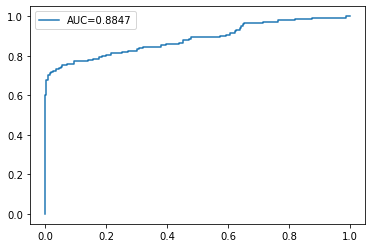

In [64]:
AUCROC( logistic_model_1, X_test)

### SMOTE

In [65]:
oversample = SMOTE(random_state=1000)
X_train_os, y_train_os = oversample.fit_sample(X_train, y_train)

In [66]:
#scaler = StandardScaler()
#scaler.fit(X_train_os)
#X_train_os = scaler.transform(X_train_os)
logistic_model_2 = LogisticRegression(solver='lbfgs', max_iter=1000).fit(X_train_os, y_train_os)

In [67]:
y_pred = logistic_model_2.predict(X_test)
confusionMatrix(y_test, y_pred)

[[82706  2588]
 [   21   128]]


,Predicted Negative,Predicted Positive
Actual Negative,82706,2588
Actual Positive,21,128


In [68]:
modelMetrics(y_test, y_pred)

Accuracy = 0.9694650234659363
Precision = 0.047128129602356406
Recall = 0.8590604026845637
F1 Score = 0.0893542757417103


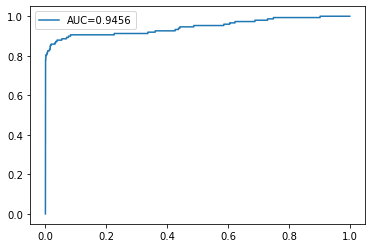

In [69]:
AUCROC( logistic_model_2, X_test)

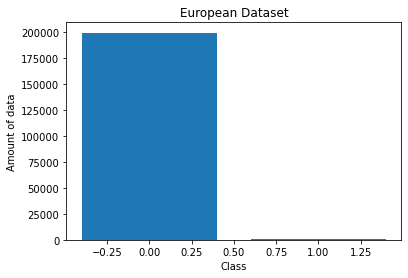

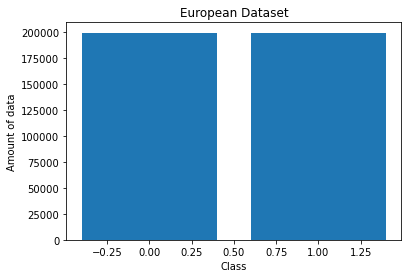

Total: 284807
Válidas: 199021
Fraude: 199021
50.0%


In [79]:
n_fraud = sum( y_train['Class'] )
n_valid = sum( y_train['Class']-1 )*-1

plt.bar([0,1], [n_valid, n_fraud])
plt.title("European Dataset")
plt.xlabel("Class")
plt.ylabel("Amount of data")
plt.show()

n_fraud = sum( y_train_os['Class'] )
n_valid = sum( y_train_os['Class']-1 )*-1

plt.bar([0,1], [n_valid, n_fraud])
plt.title("European Dataset")
plt.xlabel("Class")
plt.ylabel("Amount of data")
plt.show()

print("Total:", len(eurData))
print("Válidas:", n_valid)
print("Fraude:", n_fraud)
print(str(round(100.0*n_fraud/(n_valid+n_fraud),4))+"%")

# SVMs 

In [6]:
from sklearn import svm

In [74]:
svm_model_1 = svm.SVC(kernel='linear').fit(X_train, y_train)

In [75]:
y_pred = svm_model_1.predict(X_test)
confusionMatrix(y_test, y_pred)

[[85280    14]
 [  100    49]]


,Predicted Negative,Predicted Positive
Actual Negative,85280,14
Actual Positive,100,49


# Autoencoders

In [7]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.optimizers import Adam, RMSprop
from keras.callbacks import EarlyStopping

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, confusion_matrix
from sklearn.metrics import f1_score, roc_auc_score, roc_curve
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle

import mglearn
import random 
#a = eurData.copy()
#eurData = eurData.drop(labels='Time', axis=1)

In [8]:
X_data = eurData.loc[:, eurData.columns!='Class']
y_data = eurData.loc[:, eurData.columns=='Class']

### Preprocesamiento

##### ...

In [9]:
#Separo los datos en fraudes (X_) y legítimos (X). Sólo se entrenará con legítimos.
val_index = y_data == 0
fraud_index = y_data == 1

X = X_data[val_index.values]
X_ = X_data[fraud_index.values]

Y = y_data[val_index.values]
Y_ = y_data[fraud_index.values]

#Train-test-split para X e Y. Realmente Y no se usará para entrenar
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=21)

#TRAIN: Convierto los dataframes en arrays
X_train = X_train.values
y_train = y_train.values
#TEST: Guardo una copia de X_test y Y_test sin fraudes.
X_test_nofraud = X_test.values
y_test_nofraud = y_test.values
#TEST: Convierto los dataframes en arrays y añado los fraudes. Revuelvo.
X_test = np.append( X_test.values, X_.values, axis=0 )
y_test = np.append( y_test.values, Y_.values )
X_test, y_test = shuffle(X_test, y_test, random_state=21)

#Normalizo:
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

X_test_nofraud = scaler.transform(X_test_nofraud)

# Modelo 1
##### Autoencoder con una capa escondida de 15 neuronas.

In [95]:
encoding_dim = 15

input_data = Input( shape=(X_train.shape[1],) )
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_data)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(X_train.shape[1], activation='sigmoid')(encoded)
# This model maps an input to its reconstruction
autoencoder = keras.Model(input_data, decoded)

autoencoder.compile(loss='mse', optimizer=Adam(), metrics=['mae','accuracy'])
autoencoder.summary()

Model: "model_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 30)]              0         
_________________________________________________________________
dense_14 (Dense)             (None, 15)                465       
_________________________________________________________________
dense_15 (Dense)             (None, 30)                480       
Total params: 945
Trainable params: 945
Non-trainable params: 0
_________________________________________________________________



### Entrenamiento

In [98]:
max_epochs = 50
batch_size = 32

monitor = EarlyStopping(monitor='loss', min_delta=1e-5, patience=10, 
        verbose=1, mode='auto', restore_best_weights=True)

history = autoencoder.fit(X_train,
                          X_train,
                          epochs=max_epochs,
                          batch_size=batch_size,
                          validation_data=(X_test_nofraud, X_test_nofraud),
                          callbacks=[monitor])

In [10]:
def plot_history(history):
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    plt.plot(history.history["loss"], label="Training Loss")
    plt.plot(history.history["val_loss"], label="Validation Loss")
    plt.legend()
    plt.subplot(1,2,2)
    plt.plot(history.history["accuracy"], label="Training Accuracy")
    plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
    plt.legend()

In [11]:
def plot_dist(dist_norm, dist_mse, y_test):
    plt.figure(figsize=(20,10))
    plt.subplot(1,2,1)
    mglearn.discrete_scatter( np.array(list(range(len(X_test)))), dist_mse, np.array(y_test) )
    plt.legend(['Valid', 'Fraud'], loc='best')
    #plt.xlabel('Data')
    plt.ylabel('Mean Squared Error')
    #plt.ylim([0, 0.1])
    plt.subplot(1,2,2)
    mglearn.discrete_scatter( np.array(list(range(len(X_test)))), dist_norm, np.array(y_test) )
    plt.legend(['Valid', 'Fraud'], loc='best')
    #plt.xlabel('Data')
    plt.ylabel('Distancia Euclidiana')
    #plt.ylim([0, 0.1])

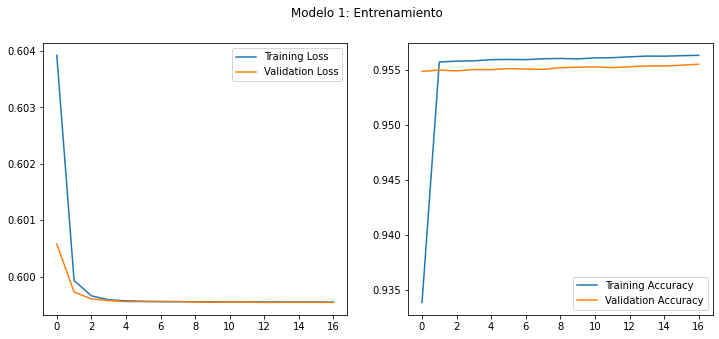

In [111]:
plot_history(history)    
plt.suptitle('Modelo 1: Entrenamiento')
plt.savefig('model1train.png')
plt.show()

In [186]:
X_rec =autoencoder.predict(X_test)
dist_norm = np.linalg.norm(X_test-X_rec, axis=1)
dist_mse = np.mean(np.power(X_test-X_rec, 2), axis=1)

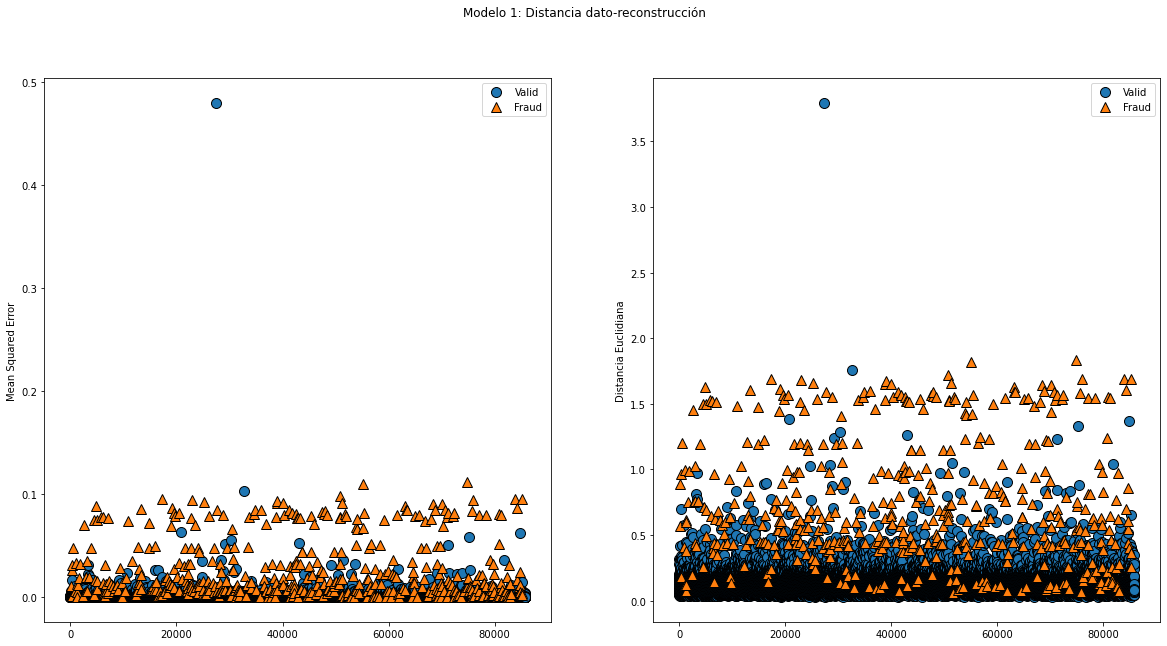

In [187]:
plot_dist(dist_norm, dist_mse, y_test)
plt.suptitle('Modelo 1: Distancia dato-reconstrucción')
plt.savefig('model1dist.png')
plt.show()

In [188]:
umbral = 0.0014
y_pred = 1*(dist_mse>=umbral)
modelMetrics(y_test, y_pred)
confusionMatrix(y_test, y_pred)

Accuracy = 0.9729446186485132
Precision = 0.15864128406121686
Recall = 0.8638211382113821
F1 Score = 0.26805424156417534
AUC = 0.9186976023432782


,Predicted Negative,Predicted Positive
Actual Negative,83041,2254
Actual Positive,67,425


In [189]:
umbral = 0.16
y_pred = 1*(dist_norm>=umbral)
modelMetrics(y_test, y_pred)
confusionMatrix(y_test, y_pred)

Accuracy = 0.9233683425227599
Precision = 0.06307471264367816
Recall = 0.8922764227642277
F1 Score = 0.11782071926999463
AUC = 0.907912055100972


,Predicted Negative,Predicted Positive
Actual Negative,78774,6521
Actual Positive,53,439


## Modelo 2

In [91]:
def make_autoencoder(input_shape, encoder_dim):
    input_layer = Input( shape=(input_shape) )
    encoded = Dense(encoder_dim[0], activation='relu')(input_layer)
    for nn in encoder_dim[1:]:
        encoded = Dense(nn, activation='relu')(encoded)

    if len(encoder_dim)==1:
        decoded = Dense(input_shape[0], activation='sigmoid')(encoded)
    else:
        decoded = Dense(encoder_dim[-2], activation='relu')(encoded)
        for nn in encoder_dim[-3::-1]:
            decoded = Dense(nn, activation='relu')(decoded)
        decoded = Dense(input_shape[0], activation='relu')(decoded)

    return keras.Model(input_layer, decoded)

encoding_dim = [15, 10, 5]
input_shape = (X_train.shape[1],)

autoencoderD = make_autoencoder(input_shape, encoding_dim)

autoencoderD.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['mae','accuracy'])
autoencoderD.summary()

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 30)]              0         
_________________________________________________________________
dense_2 (Dense)              (None, 15)                465       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                160       
_________________________________________________________________
dense_4 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_5 (Dense)              (None, 10)                60        
_________________________________________________________________
dense_6 (Dense)              (None, 15)                165       
_________________________________________________________________
dense_7 (Dense)              (None, 30)                480 

In [139]:
historyD = autoencoderD.fit(  X_train,
                              X_train,
                              epochs=500,
                              batch_size=32,
                              validation_data=(X_test_nofraud, X_test_nofraud),
                              callbacks=[monitor])

Epoch 1/500
6220/6220 [==============================] - 7s 1ms/step - loss: 3.6897 - mae: 0.2613 - accuracy: 0.8109 - val_loss: 3.6229 - val_mae: 0.2392 - val_accuracy: 0.9548
Epoch 2/500
6220/6220 [==============================] - 6s 1ms/step - loss: 3.5107 - mae: 0.2315 - accuracy: 0.9528 - val_loss: 2.0443 - val_mae: 0.1310 - val_accuracy: 0.9549
Epoch 3/500
6220/6220 [==============================] - 6s 1ms/step - loss: 2.0434 - mae: 0.1279 - accuracy: 0.9639 - val_loss: 2.0424 - val_mae: 0.1251 - val_accuracy: 0.9760
Epoch 4/500
6220/6220 [==============================] - 7s 1ms/step - loss: 1.5475 - mae: 0.1038 - accuracy: 0.8475 - val_loss: 1.3651 - val_mae: 0.0792 - val_accuracy: 0.9573
Epoch 5/500
6220/6220 [==============================] - 7s 1ms/step - loss: 1.3440 - mae: 0.0789 - accuracy: 0.9640 - val_loss: 1.1104 - val_mae: 0.0618 - val_accuracy: 0.9671
Epoch 6/500
6220/6220 [==============================] - 6s 941us/step - loss: 1.1572 - mae: 0.0648 - accuracy: 0.9

Epoch 47/500
6220/6220 [==============================] - 6s 970us/step - loss: 1.3737 - mae: 0.0722 - accuracy: 0.9550 - val_loss: 1.3736 - val_mae: 0.0722 - val_accuracy: 0.9549
Epoch 48/500
6220/6220 [==============================] - 6s 955us/step - loss: 1.3732 - mae: 0.0723 - accuracy: 0.9549 - val_loss: 1.3736 - val_mae: 0.0724 - val_accuracy: 0.9549
Epoch 49/500
6220/6220 [==============================] - 6s 961us/step - loss: 1.3733 - mae: 0.0725 - accuracy: 0.9554 - val_loss: 1.3743 - val_mae: 0.0756 - val_accuracy: 0.9548
Epoch 50/500
6220/6220 [==============================] - 6s 974us/step - loss: 1.3740 - mae: 0.0742 - accuracy: 0.9560 - val_loss: 1.3736 - val_mae: 0.0726 - val_accuracy: 0.9549
Epoch 51/500
6220/6220 [==============================] - 6s 960us/step - loss: 1.3732 - mae: 0.0727 - accuracy: 0.9557 - val_loss: 1.3736 - val_mae: 0.0727 - val_accuracy: 0.9549
Epoch 52/500
6220/6220 [==============================] - 6s 980us/step - loss: 1.3729 - mae: 0.0727

Epoch 93/500
6220/6220 [==============================] - 7s 1ms/step - loss: 0.8652 - mae: 0.0415 - accuracy: 0.9656 - val_loss: 0.8652 - val_mae: 0.0416 - val_accuracy: 0.9658
Epoch 94/500
6220/6220 [==============================] - 7s 1ms/step - loss: 0.8652 - mae: 0.0416 - accuracy: 0.9662 - val_loss: 0.8653 - val_mae: 0.0415 - val_accuracy: 0.9648
Epoch 95/500
6220/6220 [==============================] - 7s 1ms/step - loss: 0.8652 - mae: 0.0415 - accuracy: 0.9654 - val_loss: 0.8652 - val_mae: 0.0415 - val_accuracy: 0.9651
Epoch 96/500
6220/6220 [==============================] - 7s 1ms/step - loss: 0.8652 - mae: 0.0416 - accuracy: 0.9649 - val_loss: 0.8652 - val_mae: 0.0415 - val_accuracy: 0.9656
Epoch 97/500
6220/6220 [==============================] - 7s 1ms/step - loss: 0.8653 - mae: 0.0415 - accuracy: 0.9660 - val_loss: 0.8652 - val_mae: 0.0415 - val_accuracy: 0.9659
Epoch 98/500
6220/6220 [==============================] - 7s 1ms/step - loss: 0.7998 - mae: 0.0381 - accuracy:

Epoch 139/500
6220/6220 [==============================] - 6s 970us/step - loss: 0.6016 - mae: 0.0239 - accuracy: 0.9644 - val_loss: 0.6014 - val_mae: 0.0235 - val_accuracy: 0.9657
Epoch 140/500
6220/6220 [==============================] - 6s 991us/step - loss: 0.6014 - mae: 0.0237 - accuracy: 0.9642 - val_loss: 0.6015 - val_mae: 0.0243 - val_accuracy: 0.9572
Epoch 141/500
6220/6220 [==============================] - 7s 1ms/step - loss: 0.6015 - mae: 0.0237 - accuracy: 0.9642 - val_loss: 0.6014 - val_mae: 0.0235 - val_accuracy: 0.9652
Epoch 142/500
6220/6220 [==============================] - 6s 1ms/step - loss: 0.6014 - mae: 0.0238 - accuracy: 0.9651 - val_loss: 0.6014 - val_mae: 0.0237 - val_accuracy: 0.9629
Epoch 143/500
6220/6220 [==============================] - 6s 1ms/step - loss: 0.6014 - mae: 0.0237 - accuracy: 0.9659 - val_loss: 0.6013 - val_mae: 0.0237 - val_accuracy: 0.9656
Epoch 144/500
6220/6220 [==============================] - 6s 991us/step - loss: 0.6015 - mae: 0.0240

Epoch 230/500
6220/6220 [==============================] - 7s 1ms/step - loss: 0.6016 - mae: 0.0244 - accuracy: 0.9665 - val_loss: 0.6014 - val_mae: 0.0239 - val_accuracy: 0.9676
Epoch 231/500
6220/6220 [==============================] - 6s 997us/step - loss: 0.6015 - mae: 0.0241 - accuracy: 0.9682 - val_loss: 0.6015 - val_mae: 0.0244 - val_accuracy: 0.9681
Epoch 232/500
6220/6220 [==============================] - 6s 1ms/step - loss: 0.6014 - mae: 0.0240 - accuracy: 0.9689 - val_loss: 0.6014 - val_mae: 0.0240 - val_accuracy: 0.9696
Epoch 233/500
6220/6220 [==============================] - 6s 1ms/step - loss: 0.6015 - mae: 0.0241 - accuracy: 0.9675 - val_loss: 0.6015 - val_mae: 0.0244 - val_accuracy: 0.9659
Epoch 234/500
6220/6220 [==============================] - 6s 1ms/step - loss: 0.6015 - mae: 0.0242 - accuracy: 0.9674 - val_loss: 0.6014 - val_mae: 0.0241 - val_accuracy: 0.9673
Epoch 235/500
6220/6220 [==============================] - 6s 980us/step - loss: 0.6016 - mae: 0.0242 -

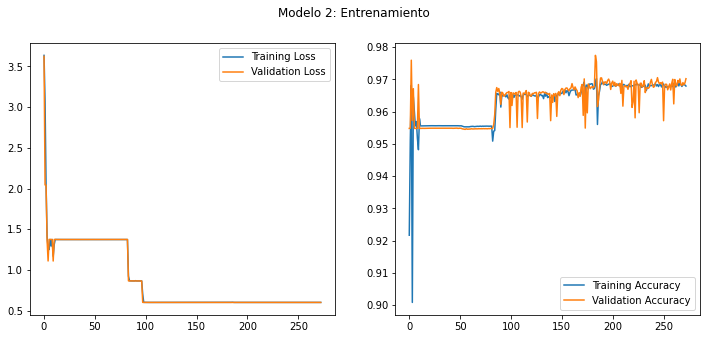

In [140]:
plot_history(historyD)
plt.suptitle('Modelo 2: Entrenamiento')
plt.show()

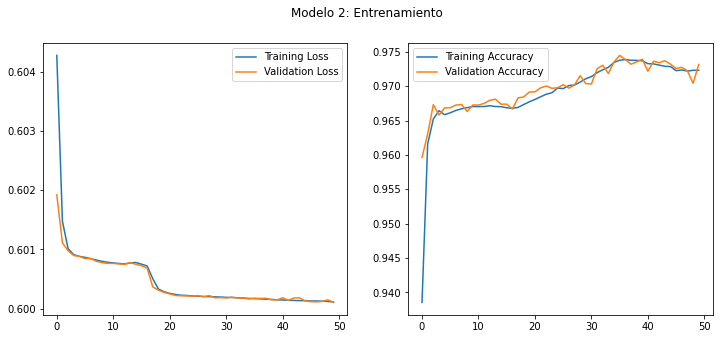

In [118]:
plot_history(historyD)
plt.suptitle('Modelo 2: Entrenamiento')
plt.savefig('model2train.png')
plt.show()

In [163]:
X_rec =autoencoderD.predict(X_test)
dist_norm = np.linalg.norm(X_test-X_rec, axis=1)
dist_mse = np.mean(np.power(X_test-X_rec, 2), axis=1)

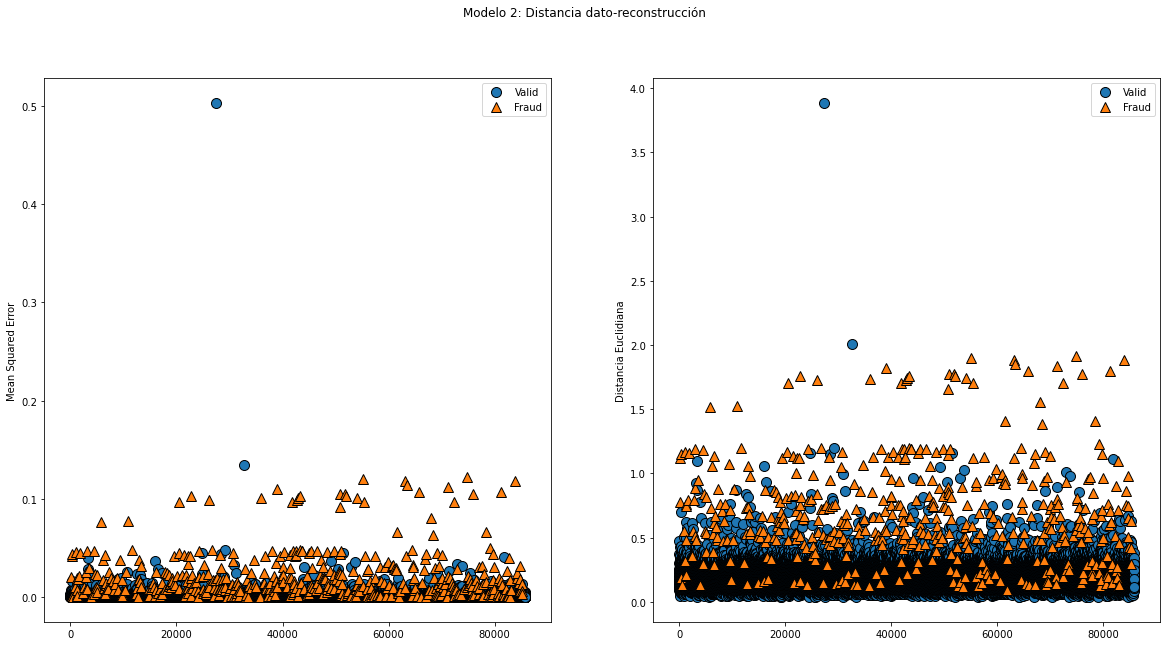

In [164]:
plot_dist(dist_norm, dist_mse, y_test)
plt.suptitle('Modelo 2: Distancia dato-reconstrucción')
plt.savefig('model2dist.png')
plt.show()

In [165]:
umbral = 0.25
y_pred = 1*(dist_norm>=umbral)
modelMetrics(y_test, y_pred)
confusionMatrix(y_test, y_pred)

Accuracy = 0.9061279681070559
Precision = 0.04988689129658293
Recall = 0.8516260162601627
F1 Score = 0.09425261500393656
AUC = 0.8790341817041477


,Predicted Negative,Predicted Positive
Actual Negative,77315,7980
Actual Positive,73,419


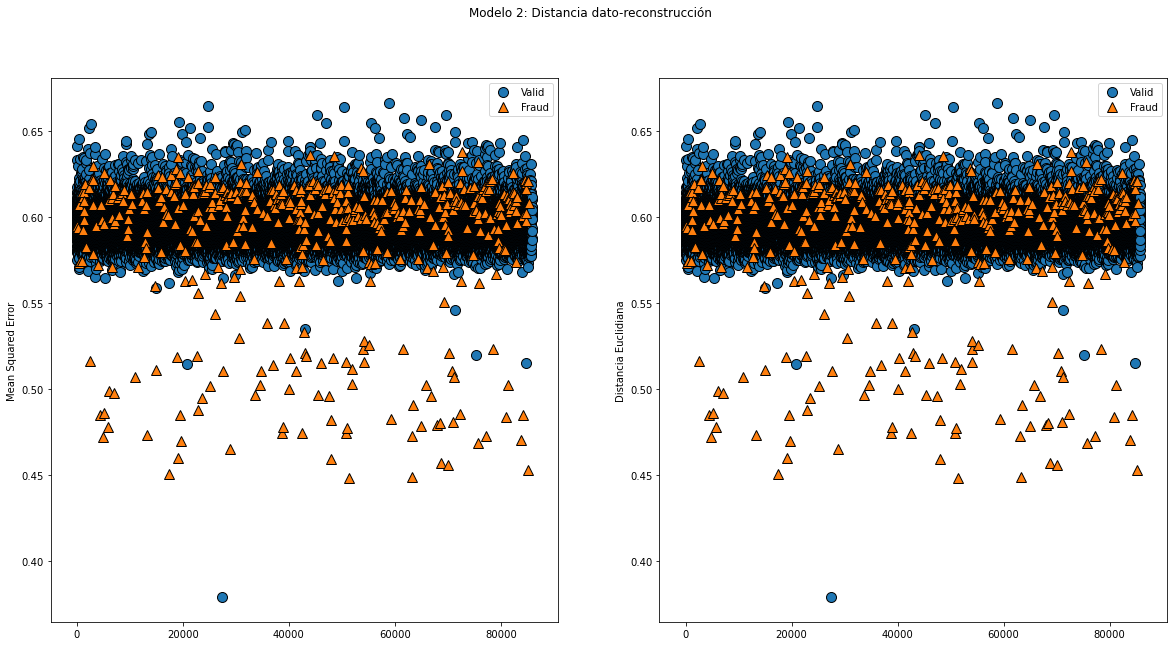

In [49]:
def log_loss(X_true, X_pred):
    resp = []
    N = X_true.shape[1]
    for i in range(len(X_true)):
        resp.append( -np.mean( X_true[i,:]*np.log(X_pred[i,:]) + (1-X_true[i,:])*np.log(1-X_pred[i,:]) ) )
    return np.array(resp)
a = np.array([[0.99,0.01,0.01],[0.5,0.5,0.5]])
b = np.array([[0.991,0.01,0.01],[0.5,0.5,0.5]])
X_rec =autoencoder_3.predict(X_test)
ll = log_loss(X_test, X_rec)

plot_dist(ll, ll, y_test)
plt.suptitle('Modelo 2: Distancia dato-reconstrucción')
plt.show()

In [29]:
umbral = 0.62
y_pred = 1*(ll<=umbral)
modelMetrics(y_test, y_pred)
confusionMatrix(y_test, y_pred)

Accuracy = 0.013801624954829986
Precision = 0.005363254648742105
Recall = 0.926829268292683
F1 Score = 0.010664795649885985
AUC = 0.4676821762062512


,Predicted Negative,Predicted Positive
Actual Negative,728,84567
Actual Positive,36,456


## Modelo 3

In [168]:
encoding_dim = [20, 15]
input_shape = (X_train.shape[1],)

autoencoderDD = make_autoencoder(input_shape, encoding_dim)

autoencoderDD.compile(loss='mse', optimizer=Adam(), metrics=['mae','accuracy'])
autoencoderDD.summary()

Model: "model_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 30)]              0         
_________________________________________________________________
dense_20 (Dense)             (None, 20)                620       
_________________________________________________________________
dense_21 (Dense)             (None, 15)                315       
_________________________________________________________________
dense_22 (Dense)             (None, 20)                320       
_________________________________________________________________
dense_23 (Dense)             (None, 30)                630       
Total params: 1,885
Trainable params: 1,885
Non-trainable params: 0
_________________________________________________________________


In [169]:
historyDD = autoencoderDD.fit(  X_train,
                              X_train,
                              epochs=500,
                              batch_size=batch_size,
                              validation_data=(X_test_nofraud, X_test_nofraud),
                              callbacks=[monitor])

Epoch 1/500
6220/6220 [==============================] - 6s 925us/step - loss: 0.1479 - mae: 0.2710 - accuracy: 0.9373 - val_loss: 0.0725 - val_mae: 0.1539 - val_accuracy: 0.9615
Epoch 2/500
6220/6220 [==============================] - 5s 826us/step - loss: 0.0724 - mae: 0.1525 - accuracy: 0.9644 - val_loss: 0.0600 - val_mae: 0.1314 - val_accuracy: 0.9548
Epoch 3/500
6220/6220 [==============================] - 5s 838us/step - loss: 0.0587 - mae: 0.1206 - accuracy: 0.9658 - val_loss: 0.0586 - val_mae: 0.1192 - val_accuracy: 0.9660
Epoch 4/500
6220/6220 [==============================] - 5s 834us/step - loss: 0.0586 - mae: 0.1189 - accuracy: 0.9654 - val_loss: 0.0585 - val_mae: 0.1178 - val_accuracy: 0.9641
Epoch 5/500
6220/6220 [==============================] - 5s 851us/step - loss: 0.0572 - mae: 0.1158 - accuracy: 0.9660 - val_loss: 0.0362 - val_mae: 0.0808 - val_accuracy: 0.9655
Epoch 6/500
6220/6220 [==============================] - 5s 847us/step - loss: 0.0348 - mae: 0.0774 - acc

6220/6220 [==============================] - 6s 909us/step - loss: 7.8798e-04 - mae: 0.0157 - accuracy: 0.9649 - val_loss: 7.8826e-04 - val_mae: 0.0157 - val_accuracy: 0.9656
Epoch 46/500
6220/6220 [==============================] - 5s 822us/step - loss: 7.8659e-04 - mae: 0.0158 - accuracy: 0.9654 - val_loss: 7.9071e-04 - val_mae: 0.0159 - val_accuracy: 0.9663
Epoch 47/500
6220/6220 [==============================] - 5s 828us/step - loss: 7.8760e-04 - mae: 0.0158 - accuracy: 0.9652 - val_loss: 7.8907e-04 - val_mae: 0.0159 - val_accuracy: 0.9662
Epoch 48/500
6220/6220 [==============================] - 5s 868us/step - loss: 7.8785e-04 - mae: 0.0158 - accuracy: 0.9654 - val_loss: 7.8757e-04 - val_mae: 0.0158 - val_accuracy: 0.9659
Epoch 49/500
6220/6220 [==============================] - 5s 845us/step - loss: 7.7946e-04 - mae: 0.0158 - accuracy: 0.9657 - val_loss: 7.8779e-04 - val_mae: 0.0159 - val_accuracy: 0.9663
Epoch 50/500
6220/6220 [==============================] - 5s 869us/step -

Epoch 89/500
6220/6220 [==============================] - 5s 813us/step - loss: 6.3402e-04 - mae: 0.0139 - accuracy: 0.9660 - val_loss: 6.4069e-04 - val_mae: 0.0140 - val_accuracy: 0.9662
Epoch 90/500
6220/6220 [==============================] - 5s 835us/step - loss: 6.3205e-04 - mae: 0.0139 - accuracy: 0.9664 - val_loss: 6.4000e-04 - val_mae: 0.0139 - val_accuracy: 0.9662
Epoch 91/500
6220/6220 [==============================] - 5s 827us/step - loss: 6.3471e-04 - mae: 0.0139 - accuracy: 0.9664 - val_loss: 6.4002e-04 - val_mae: 0.0139 - val_accuracy: 0.9662
Epoch 92/500
6220/6220 [==============================] - 5s 871us/step - loss: 6.3333e-04 - mae: 0.0139 - accuracy: 0.9663 - val_loss: 6.4191e-04 - val_mae: 0.0140 - val_accuracy: 0.9663
Epoch 93/500
6220/6220 [==============================] - 5s 835us/step - loss: 6.3515e-04 - mae: 0.0139 - accuracy: 0.9653 - val_loss: 6.3996e-04 - val_mae: 0.0139 - val_accuracy: 0.9657
Epoch 94/500
6220/6220 [==============================] - 5s

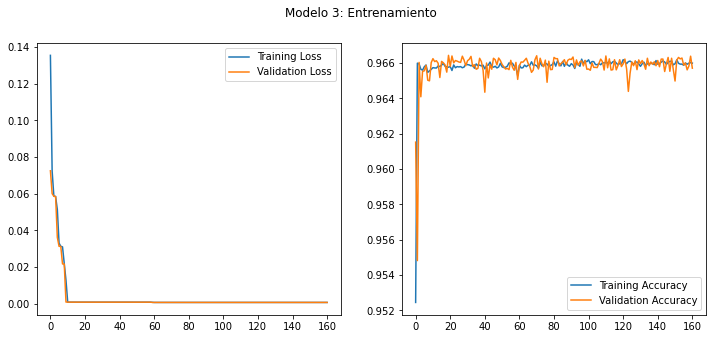

In [170]:
plot_history(historyDD)
plt.suptitle('Modelo 3: Entrenamiento')
#plt.savefig('model3train.png')
plt.show()

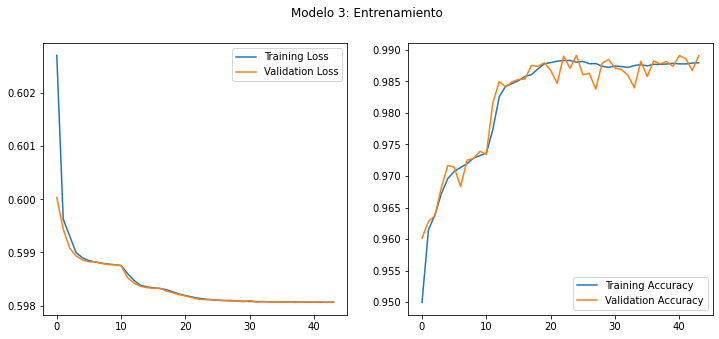

In [124]:
plot_history(historyDD)
plt.suptitle('Modelo 3: Entrenamiento')
plt.savefig('model3train.png')
plt.show()

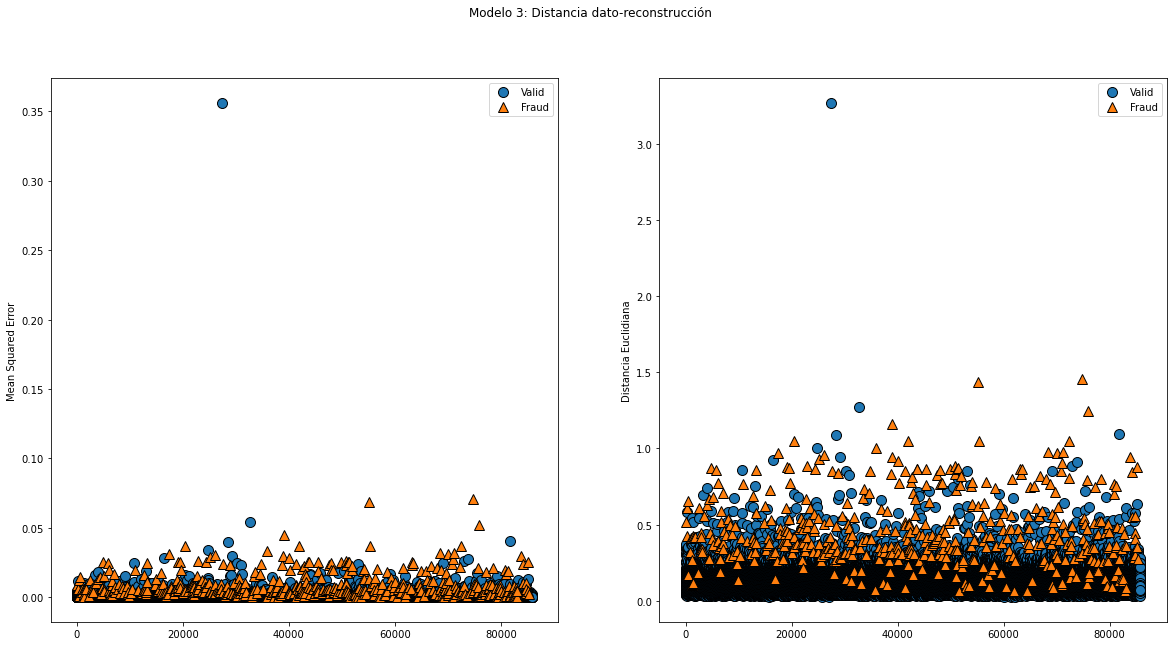

In [191]:
X_rec =autoencoderDD.predict(X_test)
dist_norm = np.linalg.norm(X_test-X_rec, axis=1)
dist_mse = np.mean(np.power(X_test-X_rec, 2), axis=1)
plot_dist(dist_norm, dist_mse, y_test)
plt.suptitle('Modelo 3: Distancia dato-reconstrucción')
plt.savefig('model3dist.png')
plt.show()

In [193]:
umbral = 0.19
y_pred = 1*(dist_norm>=umbral)
modelMetrics(y_test, y_pred)
confusionMatrix(y_test, y_pred)

Accuracy = 0.9343956543532237
Precision = 0.07313829787234043
Recall = 0.8943089430894309
F1 Score = 0.13521819299323912
AUC = 0.9144679131298024


,Predicted Negative,Predicted Positive
Actual Negative,79719,5576
Actual Positive,52,440


### Save Models

In [127]:
#autoencoder  .save('autoencoder_1.h5')
#autoencoderD .save('autoencoder_2.h5')
#autoencoderDD.save('autoencoder_3.h5')

### Load Models

In [12]:
autoencoder_1   = keras.models.load_model('autoencoder_1.h5')
autoencoder_2  = keras.models.load_model('autoencoder_2.h5')
autoencoder_3 = keras.models.load_model('autoencoder_3.h5')

In [195]:
input_data = Input( shape=(X_train.shape[1],) )
# "encoded" is the encoded representation of the input
encoded = Dense(10, activation='relu')(input_data)
encoded = Dense(10, activation='relu')(encoded)
encoded = Dense(5, activation='relu')(encoded)
encoded = Dense(5, activation='relu')(encoded)
encoded = Dense(10, activation='relu')(encoded)
encoded = Dense(10, activation='relu')(encoded)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(X_train.shape[1], activation='sigmoid')(encoded)
# This model maps an input to its reconstruction
autoencoder7 = keras.Model(input_data, decoded)

autoencoder7.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['mae','accuracy'])
autoencoder7.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 30)]              0         
_________________________________________________________________
dense_20 (Dense)             (None, 10)                310       
_________________________________________________________________
dense_21 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_22 (Dense)             (None, 5)                 55        
_________________________________________________________________
dense_23 (Dense)             (None, 5)                 30        
_________________________________________________________________
dense_24 (Dense)             (None, 10)                60        
_________________________________________________________________
dense_25 (Dense)             (None, 10)                110 

In [205]:
history7 = autoencoder7.fit(  X_train,
                              X_train,
                              epochs=max_epochs,
                              batch_size=500,
                              validation_data=(X_test_nofraud, X_test_nofraud),
                              callbacks=[monitor])

Epoch 1/50
399/399 [==============================] - 1s 2ms/step - loss: 0.6008 - mae: 0.0217 - accuracy: 0.9698 - val_loss: 0.6008 - val_mae: 0.0217 - val_accuracy: 0.9704
Epoch 2/50
399/399 [==============================] - 1s 2ms/step - loss: 0.6008 - mae: 0.0217 - accuracy: 0.9697 - val_loss: 0.6008 - val_mae: 0.0217 - val_accuracy: 0.9698
Epoch 3/50
399/399 [==============================] - 1s 2ms/step - loss: 0.6008 - mae: 0.0217 - accuracy: 0.9700 - val_loss: 0.6008 - val_mae: 0.0217 - val_accuracy: 0.9702
Epoch 4/50
399/399 [==============================] - 1s 2ms/step - loss: 0.6008 - mae: 0.0217 - accuracy: 0.9698 - val_loss: 0.6008 - val_mae: 0.0217 - val_accuracy: 0.9692
Epoch 5/50
399/399 [==============================] - 1s 2ms/step - loss: 0.6008 - mae: 0.0217 - accuracy: 0.9697 - val_loss: 0.6008 - val_mae: 0.0217 - val_accuracy: 0.9697
Epoch 6/50
399/399 [==============================] - 1s 2ms/step - loss: 0.6008 - mae: 0.0217 - accuracy: 0.9698 - val_loss: 0.60

Epoch 48/50
399/399 [==============================] - 1s 2ms/step - loss: 0.6007 - mae: 0.0218 - accuracy: 0.9695 - val_loss: 0.6007 - val_mae: 0.0218 - val_accuracy: 0.9694
Epoch 49/50
399/399 [==============================] - 1s 2ms/step - loss: 0.6007 - mae: 0.0217 - accuracy: 0.9696 - val_loss: 0.6007 - val_mae: 0.0218 - val_accuracy: 0.9693
Epoch 50/50
399/399 [==============================] - 1s 2ms/step - loss: 0.6007 - mae: 0.0217 - accuracy: 0.9699 - val_loss: 0.6008 - val_mae: 0.0219 - val_accuracy: 0.9701


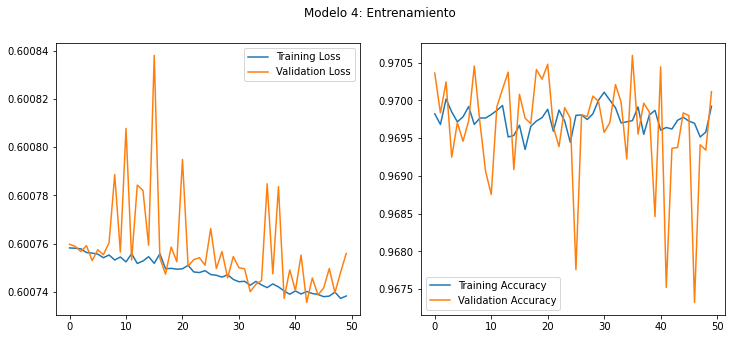

In [206]:
plot_history(history7)
plt.suptitle('Modelo 4: Entrenamiento')
#plt.savefig('model3train.png')
plt.show()

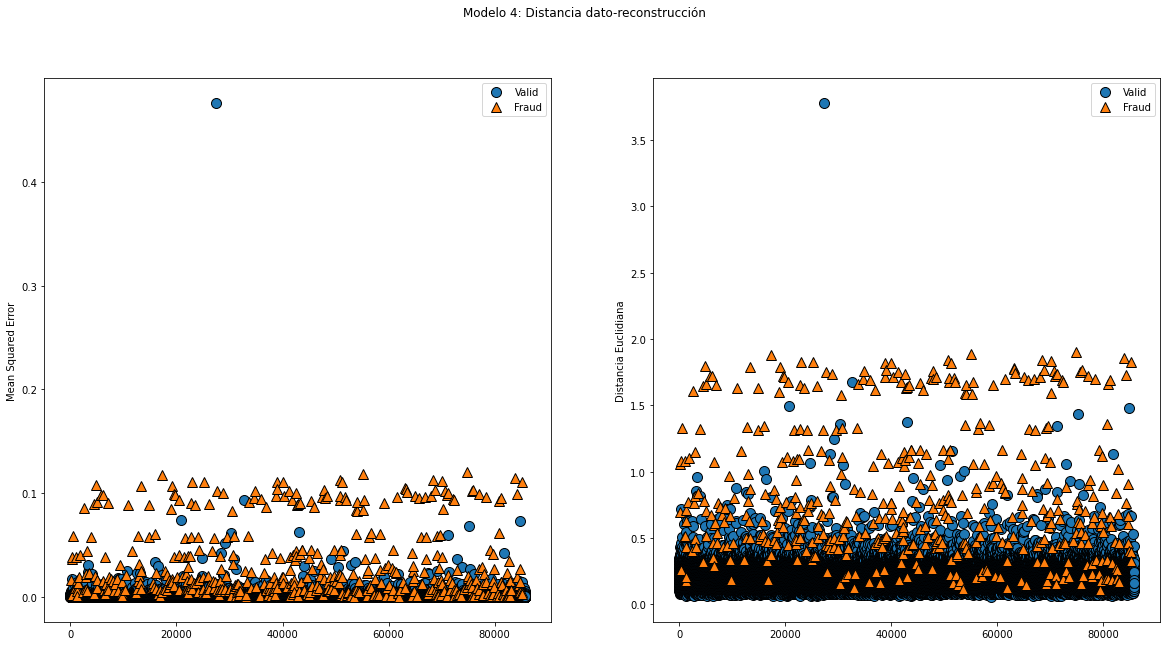

In [207]:
X_rec =autoencoder7.predict(X_test)
dist_norm = np.linalg.norm(X_test-X_rec, axis=1)
dist_mse = np.mean(np.power(X_test-X_rec, 2), axis=1)
plot_dist(dist_norm, dist_mse, y_test)
plt.suptitle('Modelo 4: Distancia dato-reconstrucción')
#plt.savefig('model3dist.png')
plt.show()

In [208]:
umbral = 0.35
y_pred = 1*(dist_norm>=umbral)
modelMetrics(y_test, y_pred)
confusionMatrix(y_test, y_pred)

Accuracy = 0.9808362572417733
Precision = 0.20820668693009117
Recall = 0.8353658536585366
F1 Score = 0.33333333333333326
AUC = 0.9085206078187754


,Predicted Negative,Predicted Positive
Actual Negative,83732,1563
Actual Positive,81,411


# One class SVM

In [54]:
from sklearn.svm import OneClassSVM

### linear

In [215]:
svm_l = [OneClassSVM(kernel = 'linear', nu=0.1), OneClassSVM(kernel = 'linear', nu=0.15), OneClassSVM(kernel = 'linear', nu=0.2), OneClassSVM(kernel = 'linear', nu=0.25) ]
[svm_l[i].fit(X_train) for i in range(4)]

[OneClassSVM(kernel='linear', nu=0.1),
 OneClassSVM(kernel='linear', nu=0.15),
 OneClassSVM(kernel='linear', nu=0.2),
 OneClassSVM(kernel='linear', nu=0.25)]

In [216]:
for i, svm in enumerate(svm_l):
    y_pred = svm.predict(X_test)
    y_pred = (y_pred*-1 + 1)/2
    modelMetrics(y_test, y_pred)
    print("")
    print(confusionMatrix(y_test, y_pred))
    print("")
    print("----------------------------------")

Accuracy = 0.8993204098523087
Precision = 0.044310171198388724
Recall = 0.8048780487804879
F1 Score = 0.08399618199172765
AUC = 0.8523716112945173

                 Predicted Negative  Predicted Positive
Actual Negative               76754                8541
Actual Positive                  96                 396

----------------------------------
Accuracy = 0.8500705235058925
Precision = 0.030657155865837
Recall = 0.8211382113821138
F1 Score = 0.05910753474762254
AUC = 0.8356878113596189

                 Predicted Negative  Predicted Positive
Actual Negative               72521               12774
Actual Positive                  88                 404

----------------------------------
Accuracy = 0.7992469721519577
Precision = 0.023633257403189067
Recall = 0.8434959349593496
F1 Score = 0.04597828495457567
AUC = 0.8212438347638064

                 Predicted Negative  Predicted Positive
Actual Negative               68150               17145
Actual Positive                  77    

In [214]:
#y_pred = (y_pred*-1 + 1)/2
modelMetrics(y_test, y_pred)
print(confusionMatrix(y_test, y_pred))

Accuracy = 0.899180528518307
Precision = 0.04607679465776294
Recall = 0.8414634146341463
F1 Score = 0.08736942070275404
AUC = 0.870488433971625
                 Predicted Negative  Predicted Positive
Actual Negative               76724                8571
Actual Positive                  78                 414


### rbf

In [24]:
gamma = [0.1, 0.811, 1.5]
svm_r = []
for g in gamma:
    svm_r.append(OneClassSVM(nu=0.1, gamma=g, verbose=True, cache_size=10000))
n = len(gamma)
for i in range(n):
    print(i)
    svm_r[i].fit(pd.DataFrame(X_train).sample(100000, random_state=21).to_numpy())
svm_r 

0
[LibSVM]1
[LibSVM]2
[LibSVM]

[OneClassSVM(cache_size=10000, gamma=0.1, nu=0.1, verbose=True),
 OneClassSVM(cache_size=10000, gamma=0.811, nu=0.1, verbose=True),
 OneClassSVM(cache_size=10000, gamma=1.5, nu=0.1, verbose=True)]

In [25]:
for j, g in enumerate(gamma):
    print("------gamma =",g,"------")
    for i, svm in enumerate(svm_r):
        y_pred = svm.predict(X_test)
        y_pred = (y_pred*-1 + 1)/2
        modelMetrics(y_test, y_pred)
        print("")
        print(confusionMatrix(y_test, y_pred))
        print("")
        print("----------------------------------")

------gamma = 0.1 ------
Accuracy = 0.8992504691853078
Precision = 0.044789456048251984
Recall = 0.8150406504065041
F1 Score = 0.0849126521969296
AUC = 0.8573884300159609

                 Predicted Negative  Predicted Positive
Actual Negative               76743                8552
Actual Positive                  91                 401

----------------------------------
Accuracy = 0.8995185750754776
Precision = 0.04612463703372794
Recall = 0.8394308943089431
F1 Score = 0.08744442091890746
AUC = 0.8696480340587449

                 Predicted Negative  Predicted Positive
Actual Negative               76754                8541
Actual Positive                  79                 413

----------------------------------
Accuracy = 0.8988191684054694
Precision = 0.04672276350752878
Recall = 0.8577235772357723
F1 Score = 0.08861822763544729
AUC = 0.8783898969478

                 Predicted Negative  Predicted Positive
Actual Negative               76685                8610
Actual Positive  

In [14]:
#gamma = [0.01, 0.03, 0.5, 1]
gamma = [0.00015, 0.005, 0.01]
svm_r = []
for g in gamma:
    svm_r.append( [OneClassSVM(nu=0.1, gamma=g, verbose=True, cache_size=10000), OneClassSVM(nu=0.2, gamma=g, verbose=True, cache_size=10000), OneClassSVM(nu=0.3, gamma=g, verbose=True, cache_size=10000) ] )
n = len(gamma)
m = 3
for i in range(n):
    print(i)
    for j in range(m):
        print(j)
        svm_r[i][j].fit(pd.DataFrame(X_train).sample(100000, random_state=21).to_numpy())
svm_r        

0
0
[LibSVM]1
[LibSVM]2
[LibSVM]1
0
[LibSVM]1
[LibSVM]2
[LibSVM]2
0
[LibSVM]1
[LibSVM]2
[LibSVM]

[[OneClassSVM(cache_size=10000, gamma=0.00015, nu=0.1, verbose=True),
  OneClassSVM(cache_size=10000, gamma=0.00015, nu=0.2, verbose=True),
  OneClassSVM(cache_size=10000, gamma=0.00015, nu=0.3, verbose=True)],
 [OneClassSVM(cache_size=10000, gamma=0.005, nu=0.1, verbose=True),
  OneClassSVM(cache_size=10000, gamma=0.005, nu=0.2, verbose=True),
  OneClassSVM(cache_size=10000, gamma=0.005, nu=0.3, verbose=True)],
 [OneClassSVM(cache_size=10000, gamma=0.01, nu=0.1, verbose=True),
  OneClassSVM(cache_size=10000, gamma=0.01, nu=0.2, verbose=True),
  OneClassSVM(cache_size=10000, gamma=0.01, nu=0.3, verbose=True)]]

In [15]:
for j, g in enumerate(gamma):
    print("------gamma =",g,"------")
    for i, svm in enumerate(svm_r[j]):
        y_pred = svm.predict(X_test)
        y_pred = (y_pred*-1 + 1)/2
        modelMetrics(y_test, y_pred)
        print("")
        print(confusionMatrix(y_test, y_pred))
        print("")
        print("----------------------------------")

------gamma = 0.00015 ------
Accuracy = 0.8993204098523087
Precision = 0.044717719396310786
Recall = 0.8130081300813008
F1 Score = 0.08477270318957296
AUC = 0.8564132039116277

                 Predicted Negative  Predicted Positive
Actual Negative               76750                8545
Actual Positive                  92                 400

----------------------------------
Accuracy = 0.7995383915977945
Precision = 0.024642877468556142
Recall = 0.8800813008130082
F1 Score = 0.04794330952776394
AUC = 0.839577551748904

                 Predicted Negative  Predicted Positive
Actual Negative               68157               17138
Actual Positive                  59                 433

----------------------------------
Accuracy = 0.7026705678016483
Precision = 0.01710358673410293
Recall = 0.9004065040650406
F1 Score = 0.03356950706626757
AUC = 0.8009682441188091

                 Predicted Negative  Predicted Positive
Actual Negative               59837               25458
Actual Po

### sigmoid

In [9]:
svm_s = [OneClassSVM(kernel='sigmoid', nu=0.1), OneClassSVM(kernel='sigmoid', nu=0.15), OneClassSVM(kernel='sigmoid', nu=0.2), OneClassSVM(kernel='sigmoid', nu=0.25), OneClassSVM(kernel='sigmoid', nu=0.3) ]
[svm_s[i].fit(X_train) for i in range(5)]

[OneClassSVM(kernel='sigmoid', nu=0.1),
 OneClassSVM(kernel='sigmoid', nu=0.15),
 OneClassSVM(kernel='sigmoid', nu=0.2),
 OneClassSVM(kernel='sigmoid', nu=0.25),
 OneClassSVM(kernel='sigmoid', nu=0.3)]

In [10]:
for i, svm in enumerate(svm_s):
    y_pred = svm.predict(X_test)
    y_pred = (y_pred*-1 + 1)/2
    modelMetrics(y_test, y_pred)
    print("")
    print(confusionMatrix(y_test, y_pred))
    print("")
    print("----------------------------------")

Accuracy = 0.8894937461386924
Precision = 0.04049079754601227
Recall = 0.8048780487804879
F1 Score = 0.07710280373831775
AUC = 0.8474299382773417

                 Predicted Negative  Predicted Positive
Actual Negative               75911                9384
Actual Positive                  96                 396

----------------------------------
Accuracy = 0.8233298751559094
Precision = 0.026723470178156468
Recall = 0.8414634146341463
F1 Score = 0.0518018018018018
AUC = 0.8323443458070198

                 Predicted Negative  Predicted Positive
Actual Negative               70217               15078
Actual Positive                  78                 414

----------------------------------
Accuracy = 0.7727278025808106
Precision = 0.02111575870584085
Recall = 0.8516260162601627
F1 Score = 0.041209736906810915
AUC = 0.8119493584436988

                 Predicted Negative  Predicted Positive
Actual Negative               65871               19424
Actual Positive                  73   

### poly

In [ ]:
degrees = [3,4,5,6]
svm_p = []
for k in degree:
    svm_p_aux = []
    for g in gamma:
        svm_p.append([OneClassSVM(kernel='poly', gamma=g, degree=k, nu=0.1), OneClassSVM(kernel='poly', nu=0.15, gamma=g, degree=k), OneClassSVM(kernel='poly', nu=0.2, gamma=g, degree=k), OneClassSVM(kernel='poly', nu=0.25, gamma=g, degree=k), OneClassSVM(kernel='poly', nu=0.3, gamma=g, degree=k) ])

for k,_ in enumerate(degree):
    for g,__ in enumerate(gamma):
        for i in range(5):
            svm_p[5*k + g].fit(X_train)

In [ ]:
for k,d in enumerate(degree)
    print("          ----- Grado =",d,"-----")
    for j,g in enumerate(gamma):
        print("----- gamma =",g,"-----")
        for i, svm in enumerate(svm_p[5*k + g]):
            y_pred = svm.predict(X_test)
            y_pred = (y_pred*-1 + 1)/2
            modelMetrics(y_test, y_pred)
            print("")
            print(confusionMatrix(y_test, y_pred))
            print("")
            print("----------------------------------")

### precomputed

In [13]:
svm_pr = [OneClassSVM(kernel='precomputed', nu=0.1), OneClassSVM(kernel='precomputed', nu=0.15), OneClassSVM(kernel='precomputed', nu=0.2), OneClassSVM(kernel='precomputed', nu=0.25), OneClassSVM(kernel='precomputed', nu=0.3) ]
[svm_pr[i].fit(X_train) for i in range(5)]

ValueError: Precomputed matrix must be a square matrix. Input is a 199020x30 matrix.

In [ ]:
for i, svm in enumerate(svm_pr):
    y_pred = svm.predict(X_test)
    y_pred = (y_pred*-1 + 1)/2
    modelMetrics(y_test, y_pred)
    print("")
    print(confusionMatrix(y_test, y_pred))
    print("")
    print("----------------------------------")

# Isolation Forest

In [18]:
from sklearn.ensemble import IsolationForest
X_data = eurData.loc[:, eurData.columns!='Class']
y_data = eurData.loc[:, eurData.columns=='Class'].to_numpy().flatten()

In [44]:
isoF_1 = IsolationForest(
            n_estimators  = 1000,
            max_samples   ='auto',
            contamination = 0.01,
            n_jobs        = -1,
            random_state  = 123,
            verbose=True
            )

isoF_1.fit(X=X_data)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:   19.0s remaining:   57.3s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:   19.5s finished


IsolationForest(contamination=0.01, n_estimators=1000, n_jobs=-1,
                random_state=123, verbose=True)

In [45]:
y_pred = isoF_1.predict(X=X_data)
y_pred = (y_pred*-1 + 1)/2
modelMetrics(y_data, y_pred)
print(confusionMatrix(y_data, y_pred))

Accuracy = 0.9903338049977705
Precision = 0.10319410319410319
Recall = 0.5975609756097561
F1 Score = 0.17599521101466625
AUC = 0.7942872320849899
                 Predicted Negative  Predicted Positive
Actual Negative              281760                2555
Actual Positive                 198                 294


In [30]:
score = isoF_1.score_samples(X=X_data)

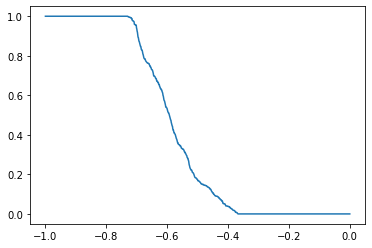

In [35]:
t = np.linspace(-1,0, 1000)
metrics = []
for umbral in t:
    y_pred = np.where(score < umbral, 0, 1)
    metrics.append( modelMetrics(y_data, y_pred, False) )

Accuracy = 0.0024472713100450482
Precision = 0.0012625907377187553
Recall = 0.7296747967479674
F1 Score = 0.0025208195823444323
AUC = 0.36543180950248555
                 Predicted Negative  Predicted Positive
Actual Negative                 338              283977
Actual Positive                 133                 359


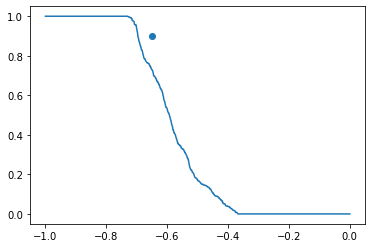

In [43]:
acc = [metric[0] for metric in metrics]
pre = [metric[1] for metric in metrics]
rec = [metric[2] for metric in metrics]
auc = [metric[4] for metric in metrics]
plt.plot(t, auc)
um = -0.65
plt.scatter(um,0.9)
y_pred = np.where(score < um, 0, 1)
modelMetrics(y_data, y_pred)
print(confusionMatrix(y_data, y_pred))

In [23]:
isoF_2 = IsolationForest(
            n_estimators  = 2000,
            max_samples   ='auto',
            contamination = 0.005,
            n_jobs        = -1,
            random_state  = 21,
            verbose=True,
            bootstrap = True
            )

isoF_2.fit(X=X_data)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:   38.3s remaining:  1.9min
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:   39.3s finished


IsolationForest(contamination=0.005, n_estimators=2000, n_jobs=-1,
                random_state=21, verbose=True)

In [24]:
y_pred = isoF_2.predict(X=X_data)
y_pred = (y_pred*-1 + 1)/2
modelMetrics(y_data, y_pred)
print(confusionMatrix(y_data, y_pred))

Accuracy = 0.994750831264681
Precision = 0.1480701754385965
Recall = 0.42886178861788615
F1 Score = 0.22013562858633284
AUC = 0.7122959383621937
                 Predicted Negative  Predicted Positive
Actual Negative              283101                1214
Actual Positive                 281                 211


In [25]:
isoF_3 = IsolationForest(
            n_estimators  = 1500,
            max_samples   ='auto',
            contamination = 0.005,
            n_jobs        = -1,
            random_state  = 21,
            verbose=True,
            bootstrap = True
            )

isoF_3.fit(X=X_data)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:   28.0s remaining:  1.4min
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:   28.5s finished


IsolationForest(bootstrap=True, contamination=0.005, n_estimators=1500,
                n_jobs=-1, random_state=21, verbose=True)

In [26]:
y_pred = isoF_3.predict(X=X_data)
y_pred = (y_pred*-1 + 1)/2
modelMetrics(y_data, y_pred)
print(confusionMatrix(y_data, y_pred))

Accuracy = 0.9947332755164023
Precision = 0.14606741573033707
Recall = 0.42276422764227645
F1 Score = 0.21711899791231734
AUC = 0.7092436406487767
                 Predicted Negative  Predicted Positive
Actual Negative              283099                1216
Actual Positive                 284                 208


In [52]:
svm_p

NameError: name 'svm_p' is not defined

# AUTOENCODER-OSVM

In [207]:
half_AE_3 = keras.Model( inputs=autoencoderDD.inputs,
                         outputs=[layer.output for layer in autoencoderDD.layers[:3]])

In [74]:
autoencoder_3.layers

In [107]:
half_AE_3.layers

In [208]:
latent_states = half_AE_3(X_train)[-1].numpy()
latent_states.shape

(199020, 15)

In [209]:
latent_test = half_AE_3(X_test)[-1].numpy()

In [210]:
osvm = OneClassSVM(verbose=1, gamma=1, nu=0.07)
osvm.fit(latent_states)
y_pred = osvm.predict(latent_test)
y_pred = (y_pred*-1 + 1)/2
modelMetrics(y_test, y_pred)
print("")
print(confusionMatrix(y_test, y_pred))

[LibSVM]Accuracy = 0.9262009395362933
Precision = 0.04016380532367302
Recall = 0.5182926829268293
F1 Score = 0.07455050431223506
AUC = 0.7234232627366429

                 Predicted Negative  Predicted Positive
Actual Negative               79201                6094
Actual Positive                 237                 255


In [50]:
X_rec = autoencoder_3.predict(X_train)
X_rec_test = autoencoder_3.predict(X_test)

dist_mse = np.mean(np.power(X_train-X_rec, 2), axis=1)
dist_mse_test = np.mean(np.power(X_test-X_rec_test, 2), axis=1)

dist_mse = dist_mse.reshape(dist_mse.shape+(1,))
dist_mse_test = dist_mse_test.reshape(dist_mse_test.shape+(1,))

In [52]:
ll_train = log_loss(X_train, X_rec)
train_data = np.append(ll_train[:,np.newaxis], dist_mse, axis=1)
test_data = np.append(ll[:,np.newaxis], dist_mse_test, axis=1)

In [64]:
osvm = OneClassSVM(verbose=1, gamma='auto', nu=0.1)
osvm.fit(train_data)
y_pred = osvm.predict(test_data)
y_pred = (y_pred*-1 + 1)/2
modelMetrics(y_test, y_pred)
print("")
print(confusionMatrix(y_test, y_pred))

[LibSVM]Accuracy = 0.8960215417254362
Precision = 0.034055727554179564
Recall = 0.6260162601626016
F1 Score = 0.06459731543624161
AUC = 0.7617976253623842

                 Predicted Negative  Predicted Positive
Actual Negative               76559                8736
Actual Positive                 184                 308


Accuracy = 0.9307587396691807
Precision = 0.06925996204933586
Recall = 0.8902439024390244
F1 Score = 0.12852112676056338
AUC = 0.9106181702241432


,Predicted Negative,Predicted Positive
Actual Negative,79409,5886
Actual Positive,54,438


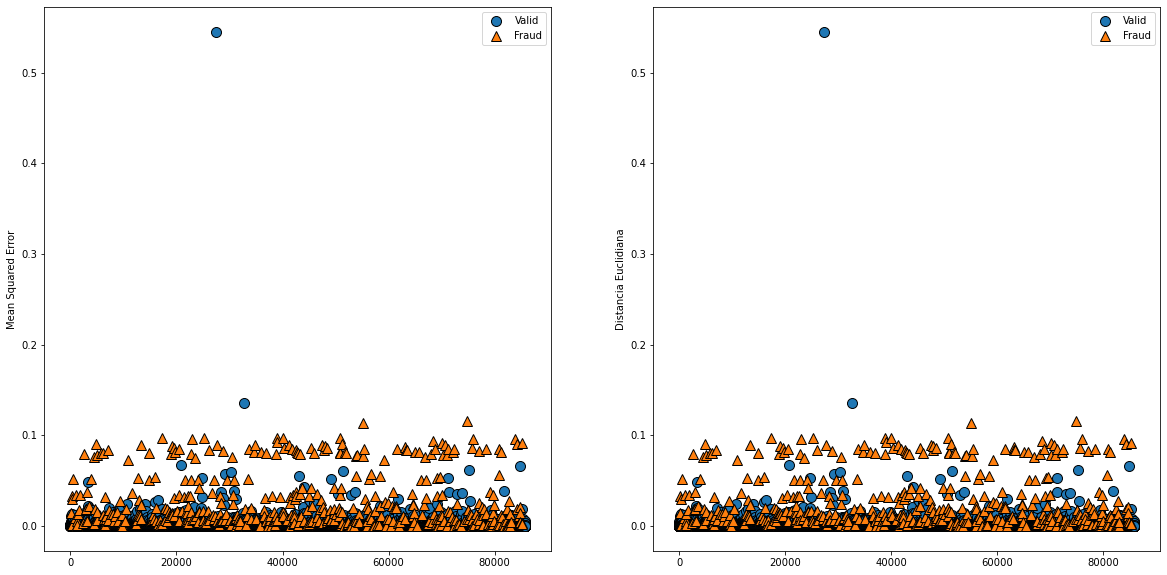

In [204]:
plot_dist(dist_mse_test, dist_mse_test, y_test)
umbral = 0.00135
y_pred = 1*(dist_mse_test>=umbral)
modelMetrics(y_test, y_pred)
confusionMatrix(y_test, y_pred)

In [205]:
osvm = OneClassSVM(verbose=1, gamma=1, nu=0.01)
osvm.fit(dist_mse)
y_pred = osvm.predict(dist_mse_test)
y_pred = (y_pred*-1 + 1)/2
modelMetrics(y_test, y_pred)
print("")
print(confusionMatrix(y_test, y_pred))

[LibSVM]Accuracy = 0.987830323941856
Precision = 0.25746924428822493
Recall = 0.5955284552845529
F1 Score = 0.3595092024539877
AUC = 0.7928108306084527

                 Predicted Negative  Predicted Positive
Actual Negative               84450                 845
Actual Positive                 199                 293


In [206]:
osvm = OneClassSVM(verbose=1, gamma=1, nu=0.1)
osvm.fit(dist_mse)
y_pred = osvm.predict(dist_mse_test)
y_pred = (y_pred*-1 + 1)/2
modelMetrics(y_test, y_pred)
print("")
print(confusionMatrix(y_test, y_pred))

[LibSVM]Accuracy = 0.8992154988518074
Precision = 0.04730179880079947
Recall = 0.8658536585365854
F1 Score = 0.08970309538850284
AUC = 0.882630797847928

                 Predicted Negative  Predicted Positive
Actual Negative               76715                8580
Actual Positive                  66                 426


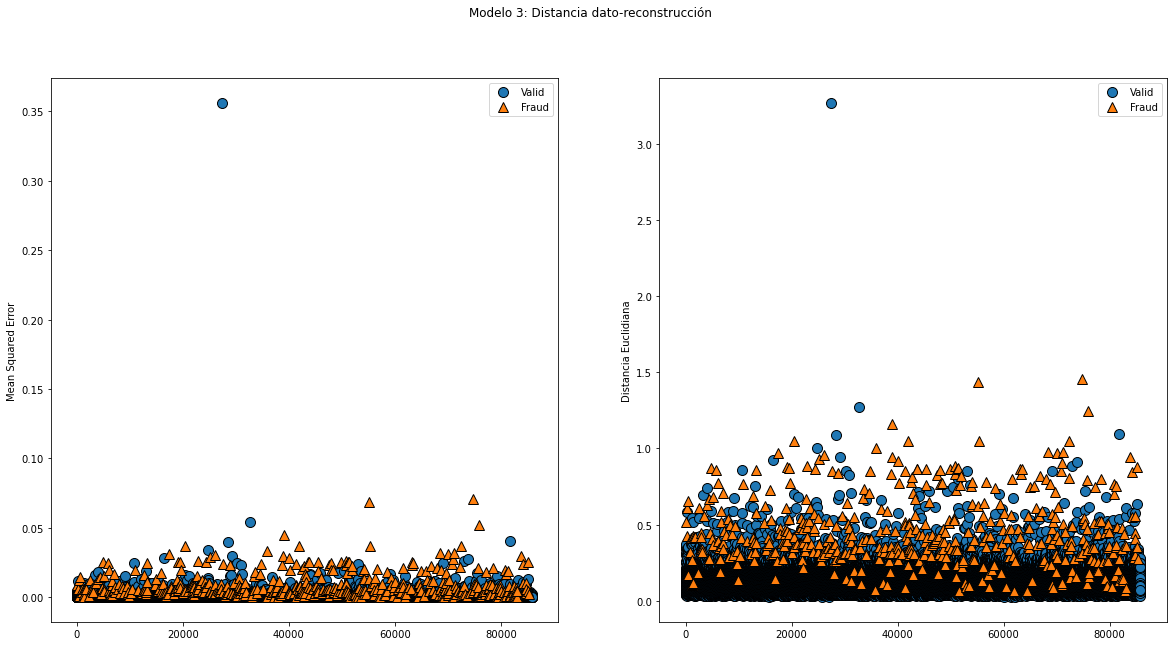

In [65]:
X_rec =autoencoder_3.predict(X_test)
dist_norm = np.linalg.norm(X_test-X_rec, axis=1)
dist_mse = np.mean(np.power(X_test-X_rec, 2), axis=1)
plot_dist(dist_norm, dist_mse, y_test)
plt.suptitle('Modelo 3: Distancia dato-reconstrucción')
#plt.savefig('model3dist.png')
plt.show()

In [74]:
umbral = 0.19
y_pred = 1*(dist_norm>=umbral)
modelMetrics(y_test, y_pred)
confusionMatrix(y_test, y_pred)

Accuracy = 0.9343956543532237
Precision = 0.07313829787234043
Recall = 0.8943089430894309
F1 Score = 0.13521819299323912
AUC = 0.9144679131298024


,Predicted Negative,Predicted Positive
Actual Negative,79719,5576
Actual Positive,52,440
